<a href="https://colab.research.google.com/github/itskritibhardwaj/ML_PROJECT/blob/master/ML_PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INTERNSHIP STUDIO: MACHINE LEARNING PROJECT (Batch: 29th July'20)**
**SUBMITTED BY- KRITI BHARDWAJ (*kriti.vimal8@gmail.com*)**



## **PROJECT TITLE : MARKETING CAMPAIGN FOR BANKING PRODUCTS**

---



**The bank has a growing customer base. The bank wants to increase borrowers (asset customers) base to bring in more loan business and earn more through the interest on loans. So , the bank wants to convert the liability based customers to personal loan customers. (while retaining them as depositors). A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. The department wants you to build a model that will help them identify the potential customers who have a higher probability of purchasing the loan. This will increase the success ratio while at the same time reduce the cost of the campaign.**

### **OBJECTIVE : THE CLASSIFICATION GOAL IS TO PREDICT THE LIKELIHOOD OF A LIABILITIES CUSTOMER BUYING PERSONAL LOANS.**

---



 **1.1 IMPORTING REQUIRED LIBRARIES**

---



In [126]:
import pandas as pd                                                # Pandas: For reading the CSV Dataset file, creating DataFrames and performing analysis
import numpy as np                                                 # NumPy: For suitable array operations in an easier way
import matplotlib.pyplot as plt                                    # Matplotlib: For plotting the graphs
import seaborn as sns                                              # Seaborn: For the purpose of visualization of data using various plots
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer


**1.2 LOADING THE DATA INTO THE DATAFRAME**

---



In [127]:
from google.colab import files
uploaded = files.upload() 

Saving Bank_Personal_Loan_Modelling 1.xlsx to Bank_Personal_Loan_Modelling 1 (1).xlsx


 **1.3 READING THE EXCEL FILE**

---



In [128]:
df=pd.read_excel('/content/Bank_Personal_Loan_Modelling 1.xlsx')
display(df)


,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0


### **ATTRIBUTE INFORMATION**

---




● ID: Customer ID

● Age: Customer's age in completed years

● Experience: #years of professional experience

● Income: Annual income of the customer ($000)

● ZIP Code: Home Address ZIP code.

● Family: Family size of the customer

● CCAvg: Avg. spending on credit cards per month ($000)

● Education: Education Level. 1: Undergrad; 2: Graduate; 3: Advanced/Professional

● Mortgage: Value of house mortgage if any. ($000)

● Personal Loan: Did this customer accept the personal loan offered in the last campaign?

● Securities Account: Does the customer have a securities account with the bank?

● CD Account: Does the customer have a certificate of deposit (CD) account with the bank?

● Online: Does the customer use internet banking facilities?

● Credit card: Does the customer use a credit card issued by the bank?




**1.4 DECCRIPTION OF THE ATTRIBUTE IN THE DATASET**

---



In [129]:
df.describe()


,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937913,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747666,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


**1.5 FINDING THE DATATYPE OF THE ATTRIBUTES**

---



In [130]:
df.dtypes

ID                      int64
Age                     int64
Experience              int64
Income                  int64
ZIP Code                int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Personal Loan           int64
Securities Account      int64
CD Account              int64
Online                  int64
CreditCard              int64
dtype: object

**1.6 FINDING SHAPE OF THE DATASET**

In [131]:
df.shape

(5000, 14)

**1.7 INFO OF DATASET**

In [132]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


**1.8 COUNT OF NULL VALUES**

In [133]:
null_counts = df.isnull().sum()
null_counts

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

# **2.DATA CLEANING**

---



**2.1 REPLACING IRRELEVANT VALUES WITH THE MEDIAN OF THE COLUMN**

In [134]:
a=df['Experience'].median()
df['Experience'] = df['Experience'].replace([-1,-2,-3], a)


**2.2 CORRELATION**

In [135]:
experience=df['Experience']
age=df['Age']
correlation = experience.corr(age)
correlation


0.9771816883703435

**2.3 DROPPING ID AND AGE WHICH MAY ACT AS A NOISE IN THE DATASET**

In [136]:
df=df.drop(['ID'],axis=1)
df.head(5)

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


# **3.DATA VISUALISATION / EDA(EXPLORATORY DATA ANALYSIS)**

---



**3.1 NUMBER OF UNIQUE VALUES IN EACH COLUMN**

In [137]:
uniqueValues = df.nunique()
print('Count of unique values in each column :')
print(uniqueValues)

Count of unique values in each column :
Age                    45
Experience             44
Income                162
ZIP Code              467
Family                  4
CCAvg                 108
Education               3
Mortgage              347
Personal Loan           2
Securities Account      2
CD Account              2
Online                  2
CreditCard              2
dtype: int64


**3.2 NUMBER OF PEOPLE WITH ZERO MORTGAGE**

In [138]:
df['Mortgage'].value_counts()[0]

3462

**3.3 NUMBER OF PEOPLE WITH ZERO CREDIT CARD SPENDING PER MONTH**

In [139]:
print("Number of people with 0 credit card:",df['CreditCard'].value_counts()[0])
print("Average spending per month:",df.groupby(df['CreditCard']).mean()['CCAvg'][0])
print("Sum of spending per month:",df.groupby(df['CreditCard']).sum()['CCAvg'][0])

Number of people with 0 credit card: 3530
Average spending per month: 1.9454532577903745
Sum of spending per month: 6867.450000000022


**3.4 VALUE COUNT OF ALL CATEGORICAL COLUMNS**

In [140]:
df['Education'].value_counts()

1    2096
3    1501
2    1403
Name: Education, dtype: int64

In [141]:
df['Personal Loan'].value_counts()


0    4520
1     480
Name: Personal Loan, dtype: int64

In [142]:
df['Securities Account'].value_counts()


0    4478
1     522
Name: Securities Account, dtype: int64

In [143]:
df['CD Account'].value_counts()


0    4698
1     302
Name: CD Account, dtype: int64

In [144]:
df['Online'].value_counts()


1    2984
0    2016
Name: Online, dtype: int64

In [145]:
df['CreditCard'].value_counts()


0    3530
1    1470
Name: CreditCard, dtype: int64

In [146]:
df_ser = df[['Personal Loan', 'Securities Account', 'CD Account', 'Online', 'CreditCard']]
df_serg= df_ser.groupby('Personal Loan').sum()
df_serg

,Securities Account,CD Account,Online,CreditCard
Personal Loan,,,,
0,462,162,2693,1327
1,60,140,291,143


**3.5 UNIVARIATE AND BIVARIATE ANALYSIS**

UNIVARIATE ANALYSIS

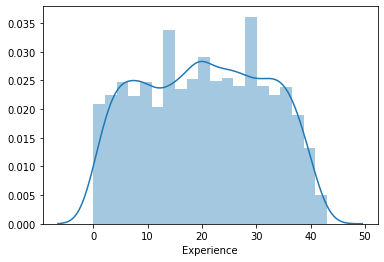

In [147]:
sns.distplot(df['Experience']);

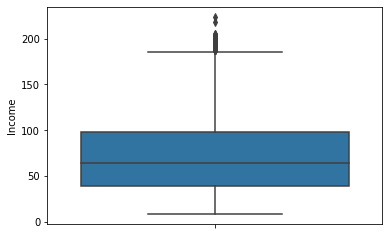

In [148]:
sns.boxplot(df['Income'], orient='vertical');

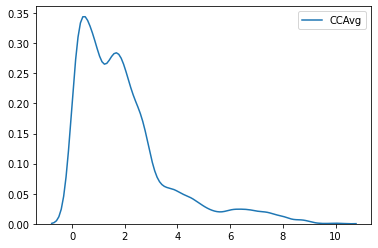

In [149]:
sns.kdeplot(df['CCAvg']);

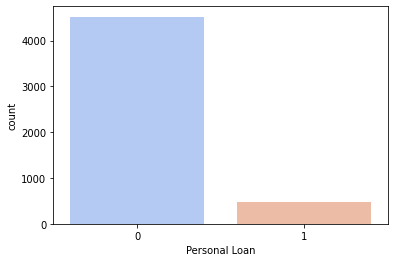

In [150]:
sns.countplot(df['Personal Loan'], palette='coolwarm');

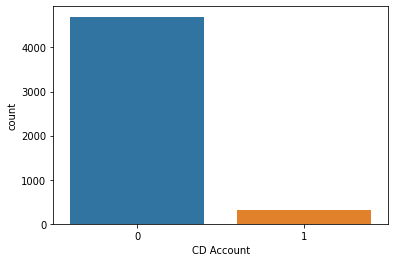

In [151]:
sns.countplot(df['CD Account']);

BIVARIATE ANALYSIS

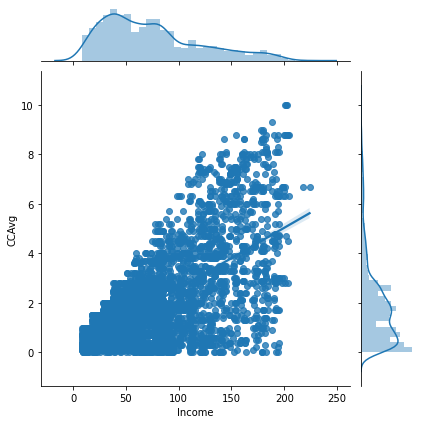

In [152]:
sns.jointplot(x='Income',y='CCAvg',data=df,kind='reg');


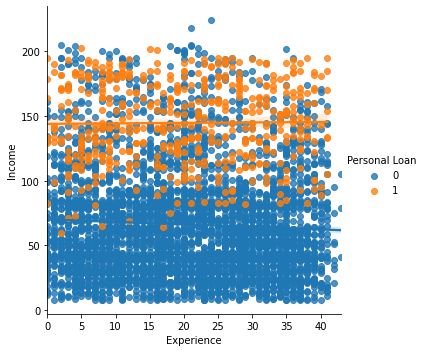

In [153]:
sns.lmplot(x='Experience', y='Income', hue='Personal Loan', data=df);

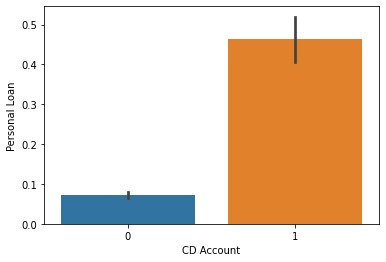

In [154]:
sns.barplot(x='CD Account', y='Personal Loan', data=df);

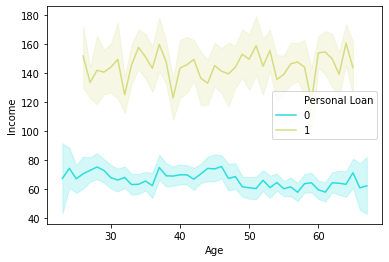

In [155]:
sns.lineplot(x="Age", y="Income", hue='Personal Loan', data=df,palette='rainbow');


MULTIVARIATE ANALYSIS

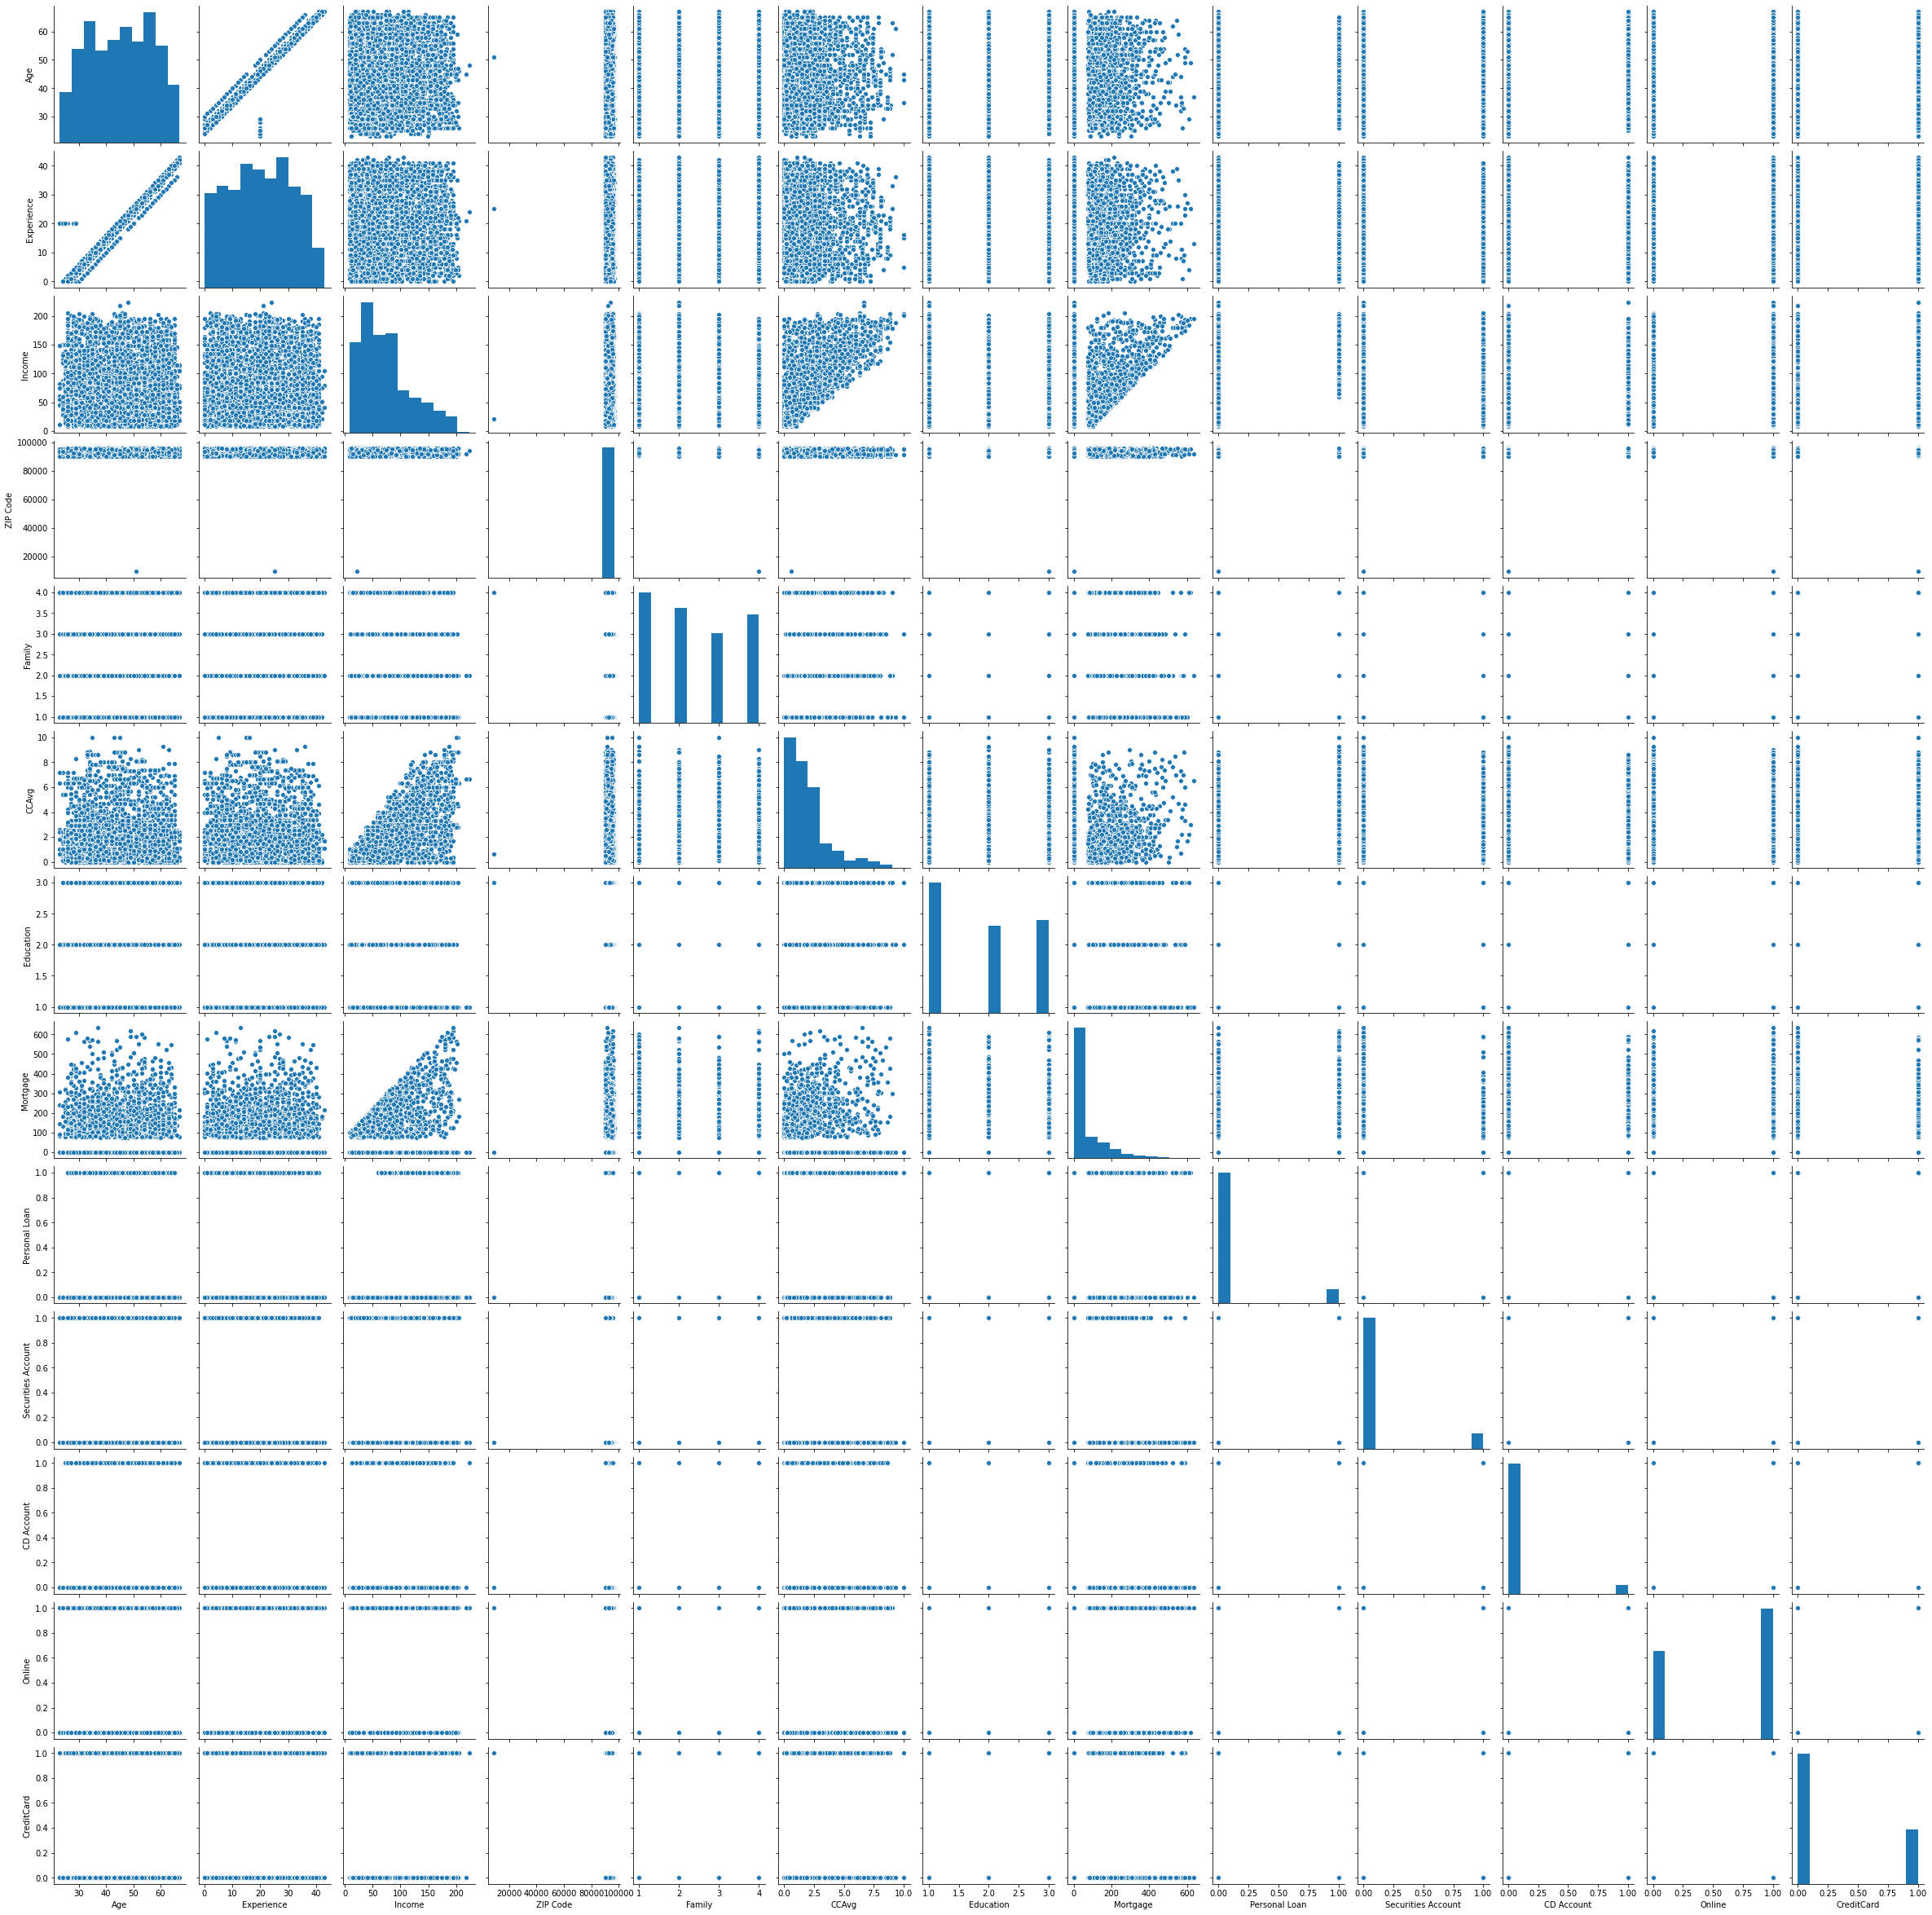

In [31]:
sns.pairplot(df, palette='coolwarm');


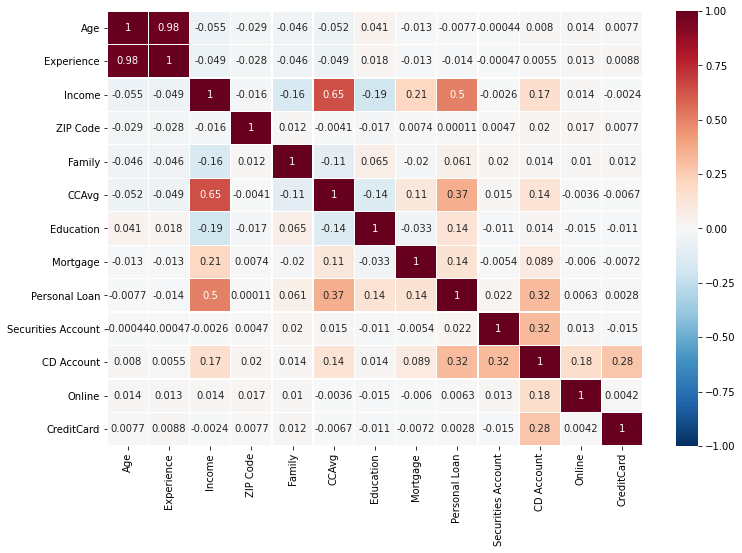

In [156]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, vmin=-1,vmax=1,center=0, cmap='RdBu_r',linecolor='white',linewidths=0.25);


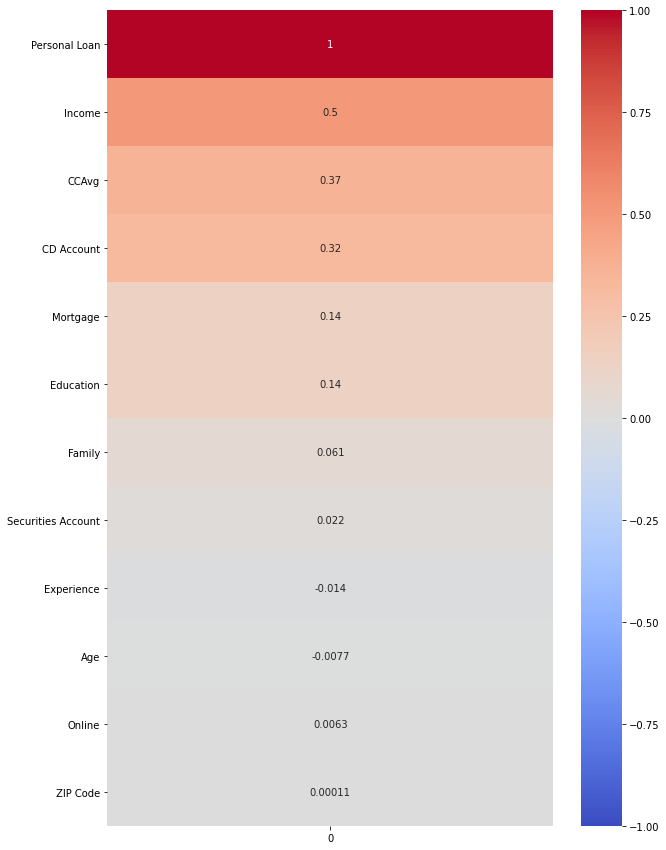

In [157]:
correlations = df.corrwith(df['Personal Loan']).iloc[:-1].to_frame()
correlations['abs'] = correlations[0].abs()
sorted_correlations = correlations.sort_values('abs', ascending=False)[0]
fig, ax = plt.subplots(figsize=(10,15))
sns.heatmap(sorted_correlations.to_frame(), cmap='coolwarm', annot=True, vmin=-1, vmax=1, ax=ax);

# **4. APPLYING CLASSIFICATION ALGORITHMS**

---



**4.1 SCATTER PLOT BETWEEN INCOME AND EDUCATION**



*   The graph below shows the non linear relation between Income and Education 
*   So here we use Logistic regression which is most fit algorithm as it cover most of the data points.


<function matplotlib.pyplot.show>

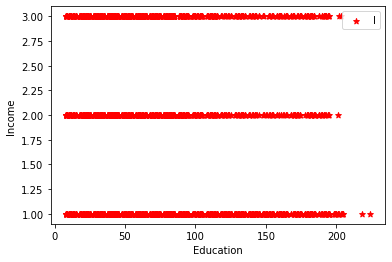

In [158]:
plt.scatter(df.Income,df.Education,color="red",marker="*")
plt.legend(('Income'))
plt.ylabel('Income ')
plt.xlabel('Education')
plt.show

 **4.1 ONE HOT CODING**

In [159]:
df.groupby(['Income'])['Personal Loan'].value_counts(normalize=True)


Income  Personal Loan
8       0                1.0
9       0                1.0
10      0                1.0
11      0                1.0
12      0                1.0
                        ... 
203     1                0.5
204     0                1.0
205     0                1.0
218     0                1.0
224     0                1.0
Name: Personal Loan, Length: 264, dtype: float64

# **5. Train-Test Dataset split & Feature Inspection and Transformation**

In this part, we will have a close check at the distribution of all the features in our Dataset. A balanced Dataset is essential for unbiased predictions from our model

In [160]:
# As we can see from our last plot in the Univariate Analysis, we have 2 classes in the 'Personal Loan' Feature. However, their ratio is approximately 1:10 which indicates that our Dataset is imbalanced.
df['Personal Loan'].value_counts()

0    4520
1     480
Name: Personal Loan, dtype: int64

We will divide our Dataset into a Training data and a Test data set, in the ratio of 70:30. The stratify parameter of train_test_split function will be used to get the same class distribution across our train and the test data set.



In [161]:
# Let's first separate out our output column 'personal loan'

X = df.loc[:, df.columns != "Personal Loan"]
y = df[["Personal Loan"]]

In [175]:
X_train, X_test ,y_train, y_test = train_test_split(X, y, test_size=0.30, stratify=y, random_state=0)
X_train.reset_index(drop=True, inplace=True);
X_test.reset_index(drop=True, inplace=True);
y_train.reset_index(drop=True, inplace=True);
y_test.reset_index(drop=True, inplace=True);

Now, let's check each of our Numerical & Ordinal Categorical features in train_X set for Skewness and Outliers. Outliers affect the learning performance thus it is very essential to perform Outlier analysis for each feature, one-by-one. For each feature, we will check two plot, Normalized histogram using distplot() to check Skewness and Boxplot to check for Outliers.Then, for Skewed data, we will apply suitable Transformation to remove the Outliers and reduce the Skewness. Outliers Analysis is not reauired for other Nominal or Binary Categorical features.



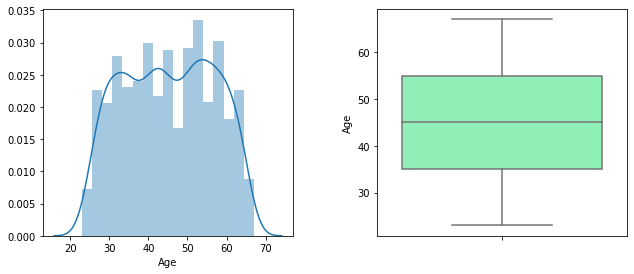

In [176]:
# Feature 1: 'Age' is our Numerical interval data.

fig, axes = plt.subplots(1, 2, figsize=(10,5))

sns.distplot(X_train["Age"], ax=axes[0]);
sns.boxplot(X_train["Age"], orient="vertical", ax=axes[1], palette = 'rainbow')

fig.tight_layout(pad=5.0)


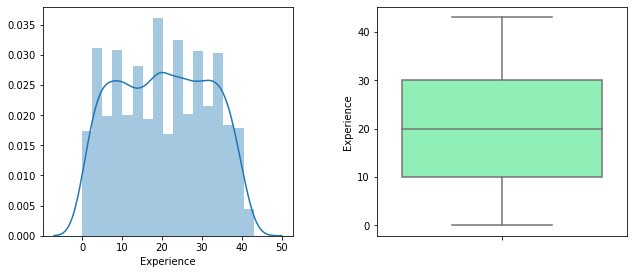

In [164]:
# Feature 2: 'Experience' is our Numerical Interval data.

fig, axes = plt.subplots(1, 2, figsize=(10,5))

sns.distplot(X_train["Experience"], ax=axes[0]);
sns.boxplot(X_train["Experience"], orient="vertical", palette="rainbow", ax=axes[1])

fig.tight_layout(pad=5.0)

As can be observed, there are no Outliers for the 'Experience' feature.



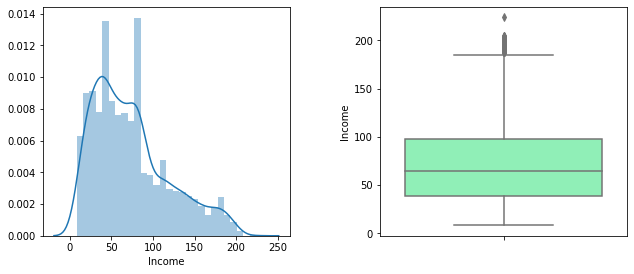

In [177]:
# Feature 3: 'Income' is our Numerical Interval data.

fig, axes = plt.subplots(1, 2, figsize=(10,5))

sns.distplot(X_train["Income"], ax=axes[0]);
sns.boxplot(X_train["Income"], orient="v", palette="rainbow", ax=axes[1]);

fig.tight_layout(pad=5.0)

Now, we have a highly skewed Distribution of Income feature. It can be classified as a log-normal distribution which means if we apply log transformation to Income, resulting distribution will be similar to a Gaussian. We will use Yeo-Johnson method from scikit-learn, PowerTransformer. The reuslting distribution is as shown below:



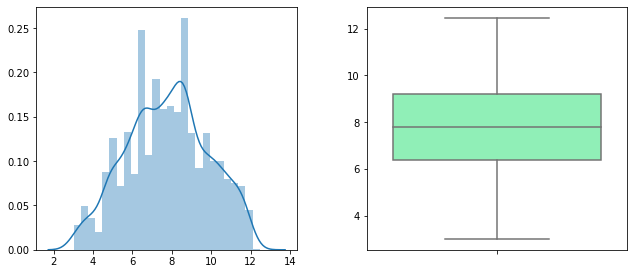

In [178]:
pt_income = PowerTransformer(method="yeo-johnson", standardize=False)

pt_income.fit(X_train["Income"].values.reshape(-1, 1))

pti = pt_income.transform(X_train["Income"].values.reshape(-1, 1))

fig, axes = plt.subplots(1, 2, figsize=(10,5))
sns.distplot(pti, ax=axes[0]);
sns.boxplot(pti, orient="v", palette="rainbow", ax=axes[1])

fig.tight_layout(pad=5.0)

As we can see, the Distribution of 'Income' feature is no longer skewed and there are no Outliers as well.



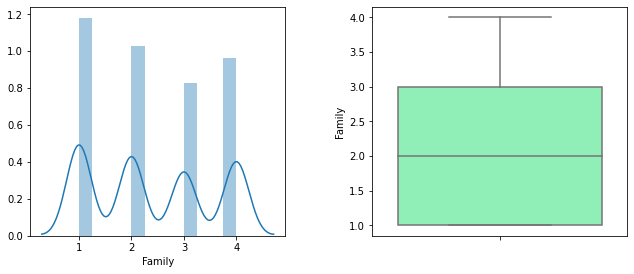

In [179]:
# Feature 4: 'Family' is our Ordinal Categorical data.
fig, axes = plt.subplots(1, 2, figsize=(10,5))

sns.distplot(X_train["Family"], ax=axes[0]);
sns.boxplot(X_train["Family"], orient="v", palette="rainbow", ax=axes[1])

fig.tight_layout(pad=5.0)

As can be observed, there are no Outliers for the 'Family' feature.



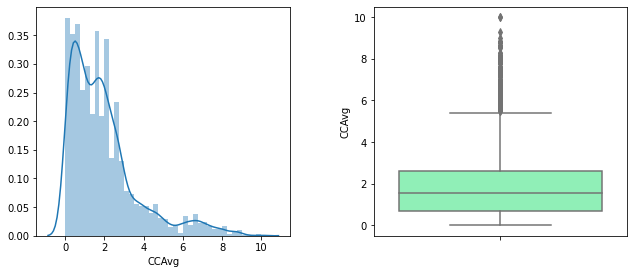

In [180]:
# Feature 5: 'CC Avg' is our Numerical Interval data.

fig, axes = plt.subplots(1, 2, figsize=(10,5))

sns.distplot(X_train["CCAvg"], ax=axes[0]);
sns.boxplot(X_train["CCAvg"], orient="v", palette="rainbow", ax=axes[1])

fig.tight_layout(pad=5.0)

Now, similar to 'Income' feature, we again have a left skewed Distribution of CC Avg feature which has a log-normal distribution. We will use the same Yeo-Johnson method from scikit-learn, PowerTransformer to apply log transformation to Income, resulting distribution will be similar to a Gaussian. The resulting distribution is as shown below:



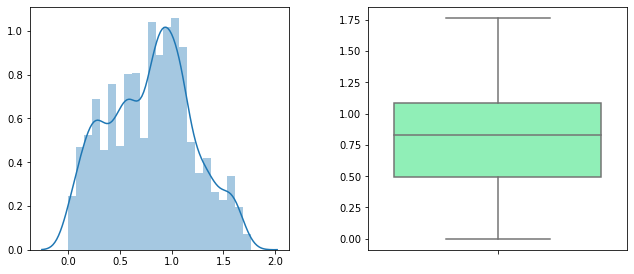

In [181]:
pt_ccavg = PowerTransformer(method="yeo-johnson", standardize=False)

pt_ccavg.fit(X_train["CCAvg"].values.reshape(-1, 1))

ptc = pt_ccavg.transform(X_train["CCAvg"].values.reshape(-1, 1))

fig, axes = plt.subplots(1, 2, figsize=(10,5))
sns.distplot(ptc, ax=axes[0]);
sns.boxplot(ptc, orient="v", palette="rainbow", ax=axes[1])

fig.tight_layout(pad=5.0)

As we can see, the Distribution of 'CC Avg' feature is no longer skewed and there are no Outliers as well.



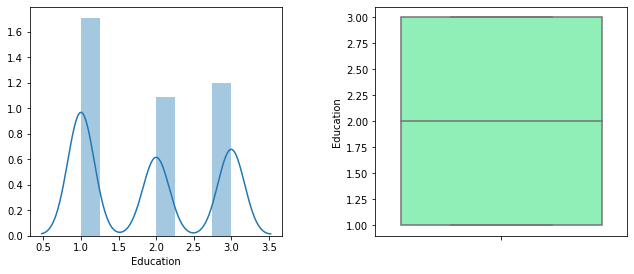

In [182]:
# Feature 6: 'Education' is our Ordinal Categorical data.

fig, axes = plt.subplots(1, 2, figsize=(10,5))

sns.distplot(X_train["Education"], ax=axes[0]);
sns.boxplot(X_train["Education"], orient="v", palette="rainbow", ax=axes[1])

fig.tight_layout(pad=5.0)

As can be observed, there are no Outliers for the 'Education' feature.



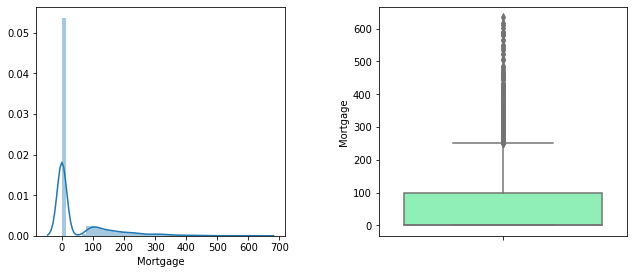

In [183]:
# Feature 7: 'Mortgage' is our Numerical Interval data.

fig, axes = plt.subplots(1, 2, figsize=(10,5))

sns.distplot(X_train["Mortgage"], ax=axes[0]);
sns.boxplot(X_train["Mortgage"], orient="v", palette="rainbow", ax=axes[1])

fig.tight_layout(pad=5.0)

As we can see, the Distribution of 'Mortgage' feature is highly skewed and there are a lot of Outliers as well. We can construct an ordinal categorical feature int_mortgage using Mortgage feature and then drop Mortgage feature. Same procedure will be applied to test_X as well.



In [184]:
X_train["int_Mortgage"] = pd.cut(X_train["Mortgage"],
                                bins=[0,100,200,300,400,500,600,700],
                                labels=[0,1,2,3,4,5,6],
                                include_lowest=True)

X_train.drop("Mortgage", axis=1, inplace=True)

X_test["int_Mortgage"] = pd.cut(X_test["Mortgage"],
                                bins=[0,100,200,300,400,500,600,700],
                                labels=[0,1,2,3,4,5,6],
                                include_lowest=True)

X_test.drop("Mortgage", axis=1, inplace=True)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stab

The remaining features are Binary Categorical. Thus, no Outlier Analysis is required.

Now let's perform 'Standardization' on our Dataset to increase our learning performance. StandardScaler of scikit-learn will be used. A StandardScaler is fit to the feature in X_train, then this scaler transforms the same feature in X_train and X_test. This process is repeated for all features.

In [185]:
for ind, column in enumerate(X_train.columns):
    scaler = StandardScaler()

    # fit to the training data
    scaler.fit(X_train[[column]])

    # transform the training data
    np_array = scaler.transform(X_train[[column]])
    X_train.loc[:, column] = pd.Series(np_array.flatten())

    # transform the test data
    np_array = scaler.transform(X_test[[column]])
    X_test.loc[:, column] = pd.Series(np_array.flatten())

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docume

Now, we inspect the linear correlations between features and also between features and output. Pandas corr function is used to compute correlation matrix and Seaborn heatmap is used for plotting. The semicolon at the end of seaborn command is used to suppress the output other than the plot. Correlation is in interval [-1,1], so our colorbar is.



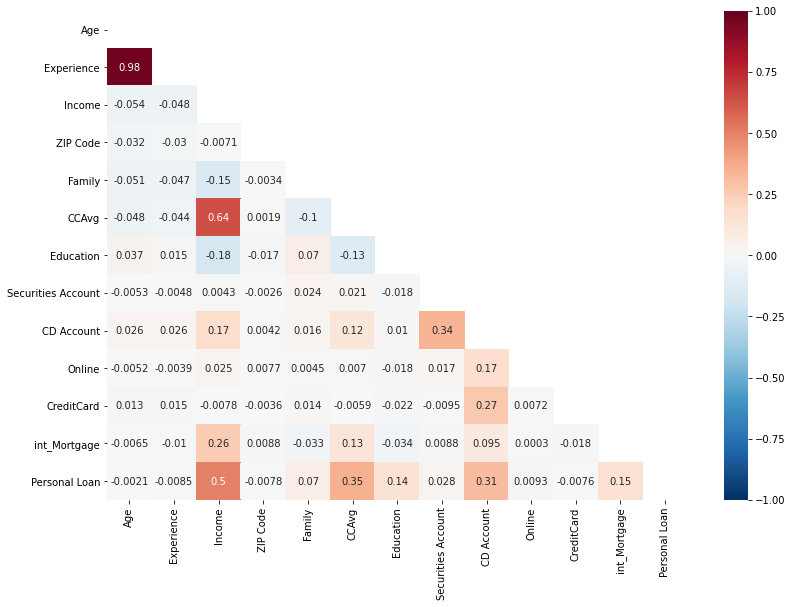

In [186]:
corr_matrix = pd.concat([X_train, y_train], axis=1).corr()
mask = np.triu(np.ones_like(corr_matrix, dtype=np.bool))

plt.figure(figsize=(13,9))
sns.heatmap(corr_matrix,annot=True,vmin=-1,vmax=1,center=0, mask=mask,cmap="RdBu_r");

# **6.LOGISTIC REGRESSION**

---



**6.1 FITTING THE MODEL**

In [187]:
model=LogisticRegression().fit(X_train,y_train)
acc=model.score(X_test, y_test)
print("\nACCURACY OF TEST :",acc*100)
acc=model.score(X_train, y_train)
print("\nACCURACY OF TRAIN  :",acc*100)


ACCURACY OF TEST : 95.13333333333334

ACCURACY OF TRAIN  : 95.22857142857143


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


**6.2 PREDICTING IF A PERSON WILL TAKE PERSONAL LOAN OR NOT**

*   If Result=0 (Then person will not take the Personal Loan.) 
*   If Result=1 (Then person will take the Personal Loan.)



In [188]:
result=model.predict([[30,23,98401,4,0.5,3,1040,1,1,1,1,0]])
print("PREDICTED RESULT OF RANDOM VALUES :",result)


PREDICTED RESULT OF RANDOM VALUES : [1]


**6.3 PREDICTION BY TAKING USER INPUT**

In [189]:
a=int(input("EXPERIENCE:"))
b=int(input("INCOME:"))
c=int(input("FAMILY:"))
d=float(input("CCAVG:"))
e=int(input("MORTGAGE(0/1):"))
f=int(input("SECURITIES ACCOUNT(0/1):"))
g=int(input("CD ACCOUNT(0/1):"))
h=int(input("ONLINE(0/1):"))
i=int(input("CREDIT CARD(0/1):"))
j=int(input("UNDERGRAD(0/1):"))
k=int(input("GRADUATE(0/1):"))
l=int (input("PROFESSIONAL(0/1):"))


EXPERIENCE:1
INCOME:1
FAMILY:1
CCAVG:1
MORTGAGE(0/1):1
SECURITIES ACCOUNT(0/1):1
CD ACCOUNT(0/1):1
ONLINE(0/1):1
CREDIT CARD(0/1):1
UNDERGRAD(0/1):1
GRADUATE(0/1):1
PROFESSIONAL(0/1):1


In [190]:
z=model.predict([[a,b,c,d,e,f,g,h,i,j,k,l]])
print("PREDICTED:",z)

PREDICTED: [1]


# **7. CONFUSION MATRIX**

---



In [191]:
from sklearn.metrics import confusion_matrix
actual=y_test
predicted=model.predict(X_test)
print("\nCONFUSION MATRIX\n",confusion_matrix(actual,predicted))



CONFUSION MATRIX
 [[1337   19]
 [  54   90]]


# **CLASSIFICATION REPORT**

---



In [192]:
from sklearn.metrics import classification_report
print("\nCLASSIFICATION_REPORT\n",classification_report(actual,predicted))


CLASSIFICATION_REPORT
               precision    recall  f1-score   support

           0       0.96      0.99      0.97      1356
           1       0.83      0.62      0.71       144

    accuracy                           0.95      1500
   macro avg       0.89      0.81      0.84      1500
weighted avg       0.95      0.95      0.95      1500



# **8.APPLYING OTHER CLASSIFICATION ALGORITHM TO CHECK THE BEST FIT MOEL AND ACCURACY OF THE MODEL**

---



**SEVERAL CLASSIFICATION ALGORITHM ARE:**


*   KNN
*   DECISION TREE
*   NAIVE BAYES CLASSIFIER
*   RANDOM FOREST CLASSIFIER 



## **8.1 KNN(K- NEAREST NIEGHBOUR)**

---



In [97]:
# Create KNN classifier
knn_model = KNeighborsClassifier(n_neighbors=21)

# fit the model
knn_model.fit(X_train, y_train)

# Predict the response for test dataset
knn_pred = knn_model.predict(X_test)

# Model Accuracy
knn_acc= metrics.accuracy_score(y_test, knn_pred)

# print accuracy score
print(f'The accuracy of the KNN Classifier is {knn_acc}')

The accuracy of the KNN Classifier is 0.9133333333333333


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """


In [193]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1)


The best accuracy was with 0.9146666666666666 with k= 1


In [99]:
knn_acc=metrics.accuracy_score(y_test,yhat)
knn_acc

0.894

In [194]:
# Set value of k as 4
k = 4

# Train Model and Predict  
loanknn = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
loanknn

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                     weights='uniform')

In [195]:
yhat = loanknn.predict(X_test)
yhat[0:5]

array([1, 0, 0, 0, 0])

**ACCURACY OF KNN MODEL**

In [196]:
print("Train set Accuracy: ", metrics.accuracy_score(y_train, loanknn.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

Train set Accuracy:  0.9634285714285714
Test set Accuracy:  0.958


**CONFUSION MATRIX FOR KNN**

In [197]:
from sklearn.metrics import classification_report

print (classification_report(y_test, yhat))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1356
           1       0.99      0.57      0.72       144

    accuracy                           0.96      1500
   macro avg       0.97      0.78      0.85      1500
weighted avg       0.96      0.96      0.95      1500



**F1_SCORE**

In [198]:
from sklearn.metrics import f1_score
knn_f=f1_score(y_test, yhat, average='weighted')
knn_f

0.9528187827556791

**JACCARD_SIMILARITY_SCORE**

In [199]:
from sklearn.metrics import jaccard_similarity_score
knn_j=jaccard_similarity_score(y_test, yhat)
knn_j

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)


0.958

## **8.2 DECISION TREE**

---



In [200]:
dt_model=DecisionTreeClassifier(criterion = 'entropy',max_depth=3)
dt_model.fit(X_train,y_train)

prediction4 = dt_model.predict(X_test)
dt_model.score(X_test,y_test)

0.9766666666666667

**FITTING AND PREDICTING THE MODEL**

In [201]:
loandt = DecisionTreeClassifier(criterion="entropy", max_depth = 2)
# Fitting the Decision tree model
loandt.fit(X_train,y_train)

# Predict using the model
pred= loandt.predict(X_test)
print("predicted",pred)

predicted [1 0 0 ... 0 0 0]


**ACCURACY OF THE MODEL**

In [202]:
model=DecisionTreeClassifier().fit(X_train,y_train)
acc=model.score(X_test, y_test)
print("\nACCURACY OF TEST :",acc*100)
acc=model.score(X_train, y_train)
print("\nACCURACY OF TRAIN  :",acc*100)


ACCURACY OF TEST : 98.26666666666667

ACCURACY OF TRAIN  : 100.0


In [203]:
dt_acc=metrics.accuracy_score(y_test,pred)
dt_acc

0.9453333333333334

**CLASSIFICATION_REPORT**

In [204]:
print (classification_report(y_test, yhat))


              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1356
           1       0.99      0.57      0.72       144

    accuracy                           0.96      1500
   macro avg       0.97      0.78      0.85      1500
weighted avg       0.96      0.96      0.95      1500



**F1_SCORE**

In [205]:
dt_f=f1_score(y_test, yhat, average='weighted')
dt_f

0.9528187827556791

**JACCARD__SIMILARITY SCORE**

In [206]:
dt_j=jaccard_similarity_score(y_test, yhat)
dt_j

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)


0.958

## **8.3 NAIVE BAYES CLASSIFIER**

---



In [123]:
from sklearn.naive_bayes import GaussianNB

naive_model = GaussianNB()
naive_model.fit(X_train,y_train)

prediction = naive_model.predict(X_test)
nbc_acc=naive_model.score(X_test,y_test)
nbc_acc

/usr/local/lib/python3.6/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.8886666666666667

# **8.4 RANDOM FOREST CLASSIFIER**

In [207]:
randomforest_model = RandomForestClassifier(max_depth=2, random_state=0)
randomforest_model.fit(X_train,y_train)

prediction2 = randomforest_model.predict(X_test)
r_acc=randomforest_model.score(X_test,y_test)
r_acc

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


0.912

# **9. COMPARISION BETWEEN DIFFERENT ALGORITHIM**

---



In [208]:
Jaccard=[knn_j,dt_j,rfc_j,nbc_j]
F1_score=[knn_f,dt_f,rfc_f,nbc_f]
Accuracy=[knn_acc*100,dt_acc*100,r_acc*100,nbc_acc*100]

df = {'Algorithm': ['KNN','Desision Tree', 'Random Forest Classifier','Naive Bayes'],
     'Jaccard': Jaccard, 'F1-score': F1_score, 'Accuracy':Accuracy}

Report = pd.DataFrame(data=df, columns=['Algorithm', 'Jaccard', 'F1-score', 'Accuracy'], index=None)
Report

,Algorithm,Jaccard,F1-score,Accuracy
0,KNN,0.958000,0.952819,89.400000
1,Desision Tree,0.958000,0.952819,94.533333
2,Random Forest Classifier,0.985333,0.984946,91.200000
3,Naive Bayes,0.888667,0.898113,88.866667


***So here we conclude that decision tree is the best fit algorithm having the highest accuracy.***